In [50]:
import numpy as np

import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten 
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
def plot_train_valid(acc=acc,val_acc=val_acc,loss=loss,val_loss=val_loss,epochs=epochs):
    sns.set(font_scale=1.4, style="whitegrid")
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs[2:], loss[2:], 'bo', label='Training loss')
    plt.plot(epochs[2:], val_loss[2:], 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Train",X_train.shape)
print("Test",X_test.shape)

Train (60000, 28, 28)
Test (10000, 28, 28)


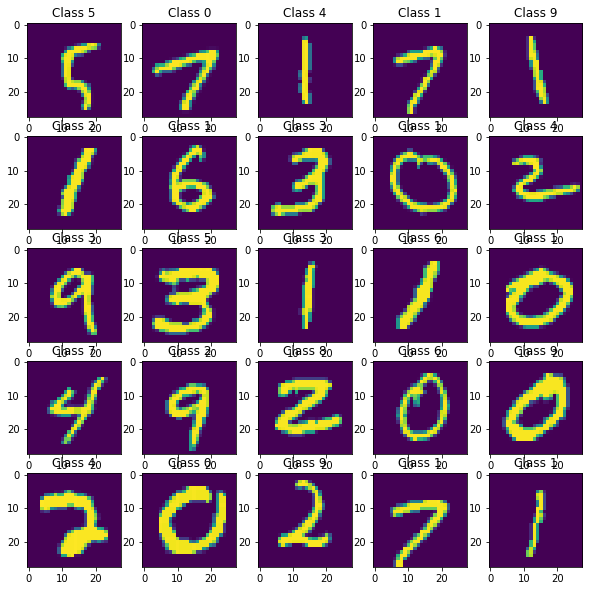

In [11]:
fig = plt.figure(figsize=(10, 10))

for idx in range(25):
    plt.subplot(5, 5, idx + 1)
    plt.imshow(X_train[idx+100])
    plt.title("Class {}".format(y_train[idx]))

# Lets try gray background

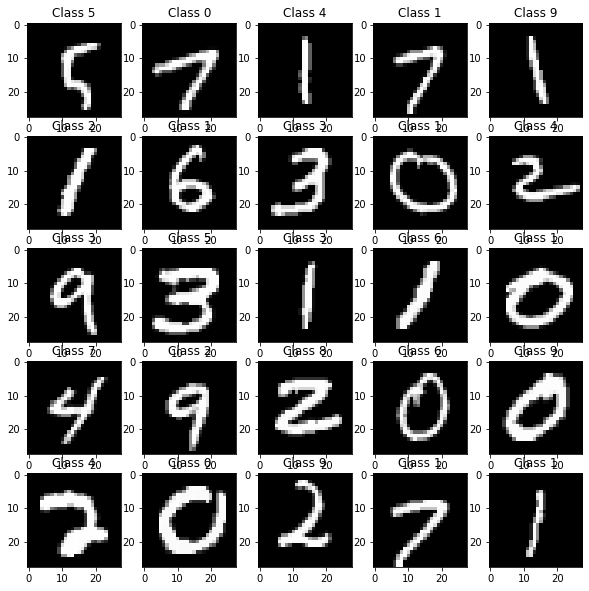

In [12]:
fig = plt.figure(figsize=(10, 10))

for idx in range(25):
    plt.subplot(5, 5, idx + 1)
    plt.imshow(X_train[idx+100], cmap = 'gray')
    plt.title("Class {}".format(y_train[idx]))

In [14]:
X_train.shape[1],X_train.shape[2]

(28, 28)

# Reshape

In [15]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype("float32")
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype("float32")

In [16]:
print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [17]:
if np.max(X_train) > 1: X_train /= 255
if np.max(X_test) > 1: X_test /= 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [20]:
num_classes = y_test.shape[1]

# First Network

In [26]:
model_first = Sequential()

model_first.add(Dense(512, input_dim=num_pixels, activation='relu'))
model_first.add(Dense(num_classes, activation='softmax'))

model_first.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_first.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model_first.fit(X_train, y_train,
          batch_size=1024, epochs=20, verbose=2,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 - 1s - loss: 0.5586 - acc: 0.8493 - val_loss: 0.2566 - val_acc: 0.9262
Epoch 2/20
60000/60000 - 1s - loss: 0.2235 - acc: 0.9375 - val_loss: 0.1894 - val_acc: 0.9450
Epoch 3/20
60000/60000 - 1s - loss: 0.1670 - acc: 0.9535 - val_loss: 0.1476 - val_acc: 0.9570
Epoch 4/20
60000/60000 - 1s - loss: 0.1320 - acc: 0.9630 - val_loss: 0.1258 - val_acc: 0.9642
Epoch 5/20
60000/60000 - 1s - loss: 0.1088 - acc: 0.9697 - val_loss: 0.1082 - val_acc: 0.9694
Epoch 6/20
60000/60000 - 1s - loss: 0.0909 - acc: 0.9749 - val_loss: 0.0989 - val_acc: 0.9697
Epoch 7/20
60000/60000 - 1s - loss: 0.0764 - acc: 0.9796 - val_loss: 0.0896 - val_acc: 0.9731
Epoch 8/20
60000/60000 - 1s - loss: 0.0661 - acc: 0.9823 - val_loss: 0.0842 - val_acc: 0.9742
Epoch 9/20
60000/60000 - 1s - loss: 0.0573 - acc: 0.9848 - val_loss: 0.0784 - val_acc: 0.9768
Epoch 10/20
60000/60000 - 1s - loss: 0.0500 - acc: 0.9873 - val_loss: 0.0744 - val_acc: 0.9775
Epoch 11/

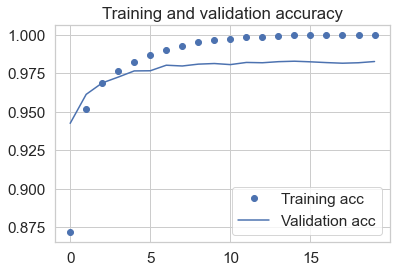

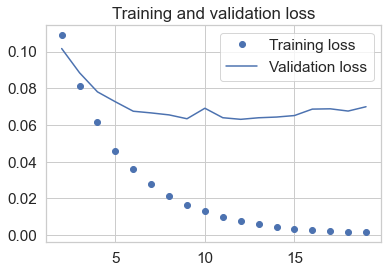

In [52]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plot_train_valid()


In [39]:
score = model_first.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("MLP Error: %.2f%%" % (100-score[1]*100))

Test loss: 0.06209169465739978
Test accuracy: 0.982
MLP Error: 1.80%


# We achieve 98% accuracy using only one layer!

# Second network - 2 layers

In [45]:
model_second = Sequential()

model_second.add(Dense(512, input_dim=num_pixels, activation='relu'))
model_second.add(Dense(256, activation='relu'))
model_second.add(Dense(num_classes, activation='softmax'))

model_second.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_second.summary()

history = model_second.fit(X_train, y_train,
          batch_size=1024, epochs=20, verbose=2,
          validation_data=(X_test, y_test))


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 - 3s - loss: 0.4819 - acc: 0.8717 - val_loss: 0.1971 - val_acc: 0.9425
Epoch 2/20
60000/60000 - 3s - loss: 0.1651 - acc: 0.9515 - val_loss: 0.1331 - val_acc: 0.9613
Epoch 3/20
60000/60000 - 3s - loss: 0.1091 - acc: 0.9687 - val_loss: 0.1016 - val_acc: 0.9687
Epoch 4/20
60000/60000 - 3s - loss: 0.0812 - a

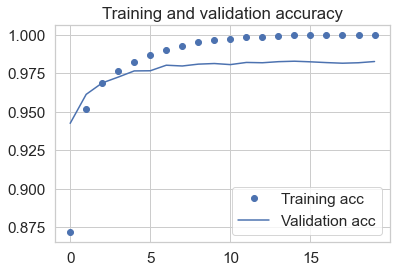

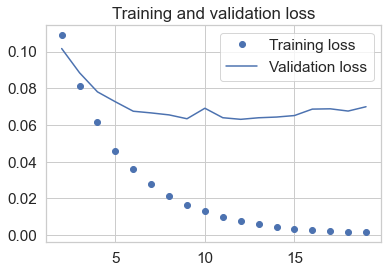

Test loss: 0.06992475527796724
Test accuracy: 0.9826
MLP Error: 1.74%


In [51]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plot_train_valid()


score = model_second.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("MLP Error: %.2f%%" % (100-score[1]*100))

# slight improvement


Test Accuracy 0.982 vs 0.9826

MLP Error :  1.80% vs 1.74%

# Lets try add 2 layers 

In [53]:
model_third = Sequential()

model_third.add(Dense(512, input_dim=num_pixels, activation='relu'))
model_third.add(Dense(256, activation='relu'))
model_third.add(Dense(128, activation='relu'))
model_third.add(Dense(64, activation='relu'))
model_third.add(Dense(num_classes, activation='softmax'))

model_third.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_third.summary()

history = model_third.fit(X_train, y_train,
          batch_size=1024, epochs=20, verbose=2,
          validation_data=(X_test, y_test))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_15 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                650       
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 - 4s - loss: 0.5690 - acc: 0.8416 - val_l

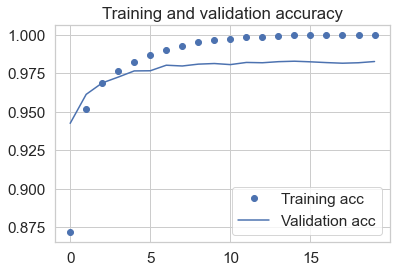

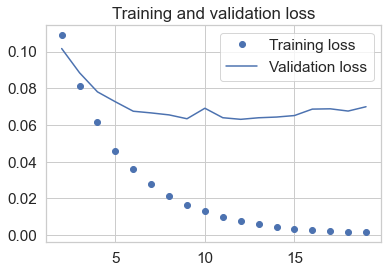

Test loss: 0.08021145826550038
Test accuracy: 0.9819
MLP Error: 1.81%


In [54]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plot_train_valid()


score = model_third.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("MLP Error: %.2f%%" % (100-score[1]*100))

# Additional layers caused overfitting. We won't use CNN because MNIST problem is too simple 